In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Doses de Bebida,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
0,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,36.0
1,11.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,54.0
2,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,51.0
3,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,24.0
4,11.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,65.0


In [71]:
# Padronização do dataset (média e desvio padrão, valores entre -1 e 1)

defaut_df = (df - df.mean()) / df.std()
defaut_df

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Doses de Bebida,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
0,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,0.947754,-0.239913,0.848342,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,0.721360,-1.035448,-1.083674,-0.306041,-0.818803
1,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,-0.552342,-0.239913,-0.384310,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,-1.386187,-1.035448,-1.083674,-0.306041,0.243693
2,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,0.947754,-0.239913,0.437458,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,-1.386187,-1.035448,-1.083674,-0.306041,0.066610
3,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,0.947754,-0.239913,1.259226,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,0.721360,1.052122,-1.083674,-0.306041,-1.527133
4,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,-0.552342,-0.239913,-0.384310,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,-1.386187,1.052122,-1.083674,-0.306041,0.892995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.815839,-1.006669,0.202448,-0.636859,0.361303,0.668078,1.509260,-0.552342,-0.239913,-0.384310,...,0.149584,1.546281,1.342068,-0.323735,0.059980,0.721360,-1.035448,-0.086542,-0.306041,0.125638
16772,1.815839,-1.006669,0.202448,-0.636859,-0.651431,-0.494182,-0.286184,-0.552342,-0.239913,-0.384310,...,0.149584,0.324751,0.298714,-0.323735,0.059980,0.721360,-1.035448,-0.086542,-0.306041,1.837435
16773,1.815839,-1.006669,1.180637,0.413264,0.361303,-0.494182,-0.286184,2.447850,-0.239913,0.848342,...,1.877444,1.546281,1.863744,-0.323735,1.672510,-1.386187,0.356266,0.910590,0.052814,0.184665
16774,1.815839,-1.006669,1.180637,1.463387,2.386771,-0.494182,-0.286184,2.447850,1.033751,2.491879,...,0.725538,0.324751,-0.222963,5.158402,0.866245,0.721360,-1.035448,1.907722,0.052814,0.302720


In [72]:
df = (df - df.min()) / (df.max() - df.min())
df

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Doses de Bebida,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
0,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.071429,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000,0.00,0.000000,0.195402
1,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.402299
2,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.047619,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.367816
3,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.095238,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.375,0.00,0.000000,0.057471
4,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.375,0.00,0.000000,0.528736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.0,0.0,0.25,0.000000,0.333333,0.333333,0.333333,0.0,0.000000,0.000000,...,0.111111,1.0,0.666667,0.000000,0.2,1.0,0.000,0.25,0.000000,0.379310
16772,1.0,0.0,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.111111,0.5,0.333333,0.000000,0.2,1.0,0.000,0.25,0.000000,0.712644
16773,1.0,0.0,0.50,0.333333,0.333333,0.000000,0.000000,1.0,0.000000,0.071429,...,0.444444,1.0,0.833333,0.000000,0.6,0.0,0.250,0.50,0.071429,0.390805
16774,1.0,0.0,0.50,0.666667,1.000000,0.000000,0.000000,1.0,0.142857,0.166667,...,0.222222,0.5,0.166667,1.000000,0.4,1.0,0.000,0.75,0.071429,0.413793


In [73]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

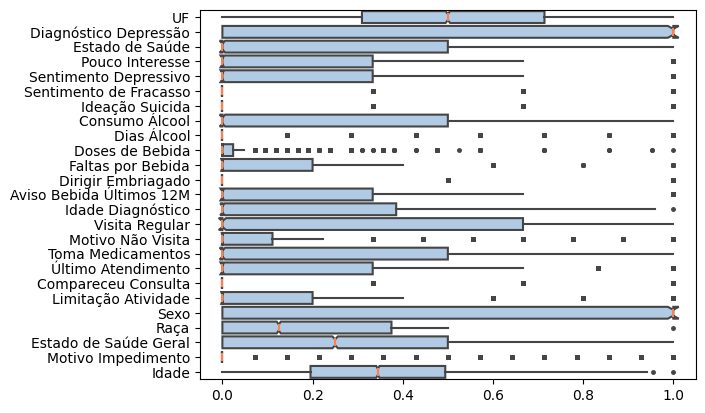

In [74]:
Outlier(df)

In [75]:
min_max_scaler = preprocessing.MinMaxScaler()
x = df.values # Retorna um array do tipo numpy
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

normalized_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.071429,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000,0.00,0.000000,0.195402
1,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.402299
2,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.047619,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.367816
3,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.095238,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.375,0.00,0.000000,0.057471
4,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.375,0.00,0.000000,0.528736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.0,0.0,0.25,0.000000,0.333333,0.333333,0.333333,0.0,0.000000,0.000000,...,0.111111,1.0,0.666667,0.000000,0.2,1.0,0.000,0.25,0.000000,0.379310
16772,1.0,0.0,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.111111,0.5,0.333333,0.000000,0.2,1.0,0.000,0.25,0.000000,0.712644
16773,1.0,0.0,0.50,0.333333,0.333333,0.000000,0.000000,1.0,0.000000,0.071429,...,0.444444,1.0,0.833333,0.000000,0.6,0.0,0.250,0.50,0.071429,0.390805
16774,1.0,0.0,0.50,0.666667,1.000000,0.000000,0.000000,1.0,0.142857,0.166667,...,0.222222,0.5,0.166667,1.000000,0.4,1.0,0.000,0.75,0.071429,0.413793


In [76]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values
array

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.1954023 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.40229885],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.36781609],
       ...,
       [1.        , 0.        , 0.5       , ..., 0.5       , 0.07142857,
        0.3908046 ],
       [1.        , 0.        , 0.5       , ..., 0.75      , 0.07142857,
        0.4137931 ],
       [1.        , 0.        , 0.5       , ..., 0.5       , 0.        ,
        0.44827586]])

In [77]:
X = array[:,0:len(df.columns)-1]
Y = array[:,len(df.columns)-1]
# X = df.drop('Diagnóstico Depressão', axis=1).values
# Y = df
print("X:", len(X), "Y:", len(Y))


X: 16776 Y: 16776


In [78]:
test_size = 0.4 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [79]:
rf = RandomForestRegressor()

rf.fit(X_train, Y_train)
predict = rf.predict(X_test)
explained_variance = metrics.explained_variance_score(Y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
mse = metrics.mean_squared_error(Y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
median_absolute_error = metrics.median_absolute_error(Y_test, predict)
r2 = metrics.r2_score(Y_test, predict)

# Mostrando o resultado de desempenho do modelo
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))


Ex.V:  0.31733012723186793
MSLE:  0.014683422863344531
R2  :  0.3153049757532942
MAE :  0.12335236796590053
MSE :  0.02599927853685063
RMSE:  0.16124291778819505


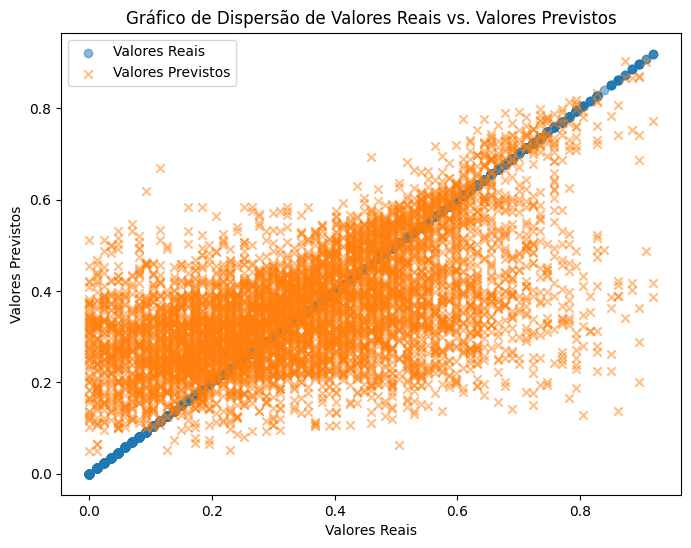

In [80]:
# Suponha que Y_test contenha os valores reais e predict contenha os valores previstos.

plt.figure(figsize=(8, 6))

# Plotagem dos valores reais com marcador 'o' (círculos)
plt.scatter(Y_test, Y_test, alpha=0.5, label='Valores Reais', marker='o')

# Plotagem dos valores previstos com marcador 'x' (cruz)
plt.scatter(Y_test, predict, alpha=0.5, label='Valores Previstos', marker='x')

plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')
plt.legend()  # Adiciona uma legenda ao gráfico

plt.show()

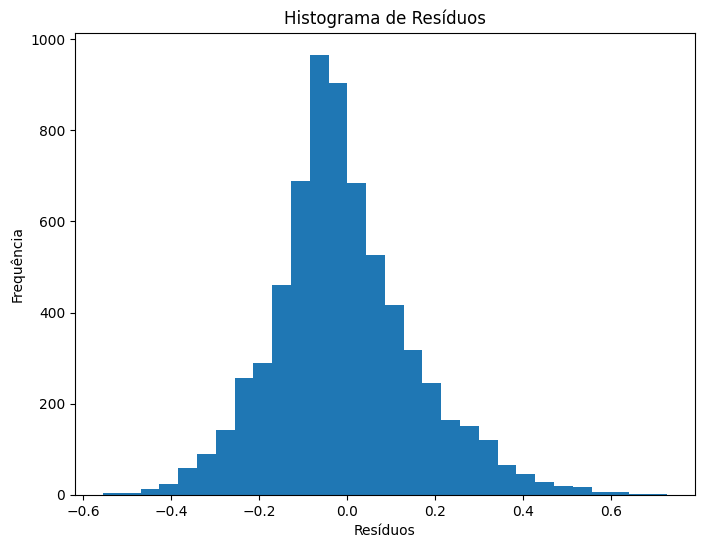

In [81]:
# Histograma de Resíduos
residuals = Y_test - predict
residuals = np.ravel(residuals)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()


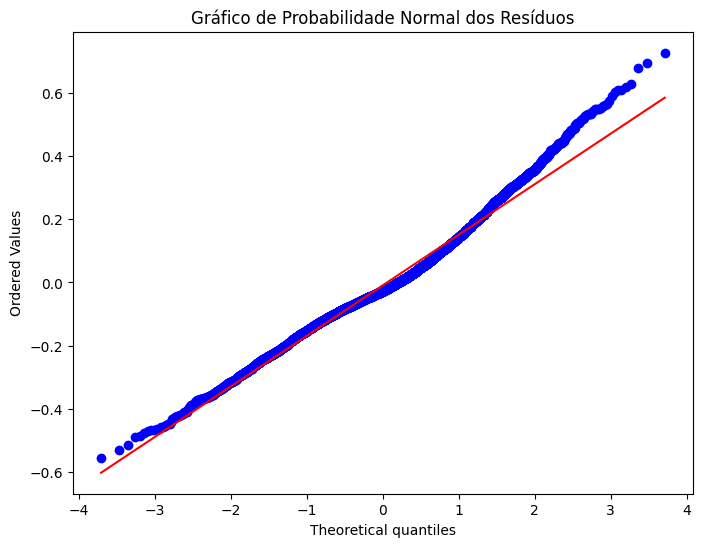

In [82]:
# Gráfico de Probabilidade Normal dos Resíduos
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Gráfico de Probabilidade Normal dos Resíduos')
plt.show()

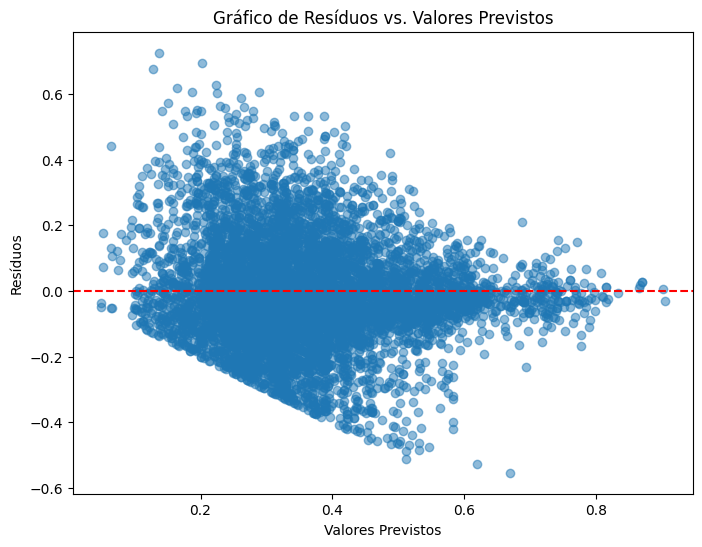

In [83]:
# Calcular os resíduos
plt.figure(figsize=(8, 6))
plt.scatter(predict, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Linha de referência dos resíduos igual a zero
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [84]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, Y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

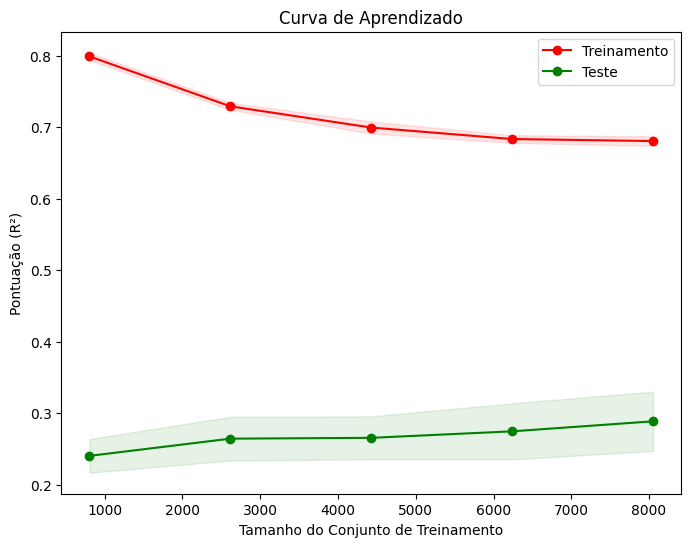

In [85]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()